###LinearRegression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/Salary_Data (2).csv')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,NaN,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,NaN,NaN
2,45.0,NaN,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
data.isnull().sum()

,0
Age,4
Gender,4
Education Level,3
Job Title,2
Years of Experience,5
Salary,7


In [ ]:
data.shape

(6704, 6)

In [ ]:
data=data.dropna()
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [ ]:
x=data.iloc[:,-2:-1].values
y=data.iloc[:,5:].values
display(x.shape,y.shape)

(6691, 1)

(6691, 1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=13)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(4683, 1)

(4683, 1)

(2008, 1)

(2008, 1)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
print(y_pred)
print(y_test)

[[ 79295.83696997]
 [157236.7997391 ]
 [121809.0893895 ]
 ...
 [107638.00524965]
 [ 79295.83696997]
 [ 79295.83696997]]
[[ 80000.]
 [170000.]
 [185000.]
 ...
 [108267.]
 [ 80000.]
 [120000.]]


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

961664563.9382249

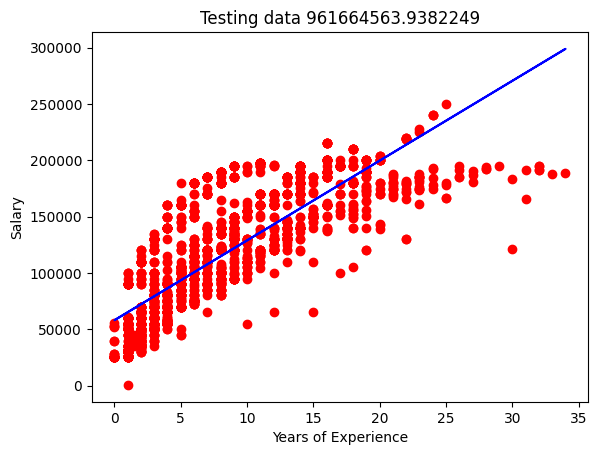

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title(f'Testing data {mse}')
plt.show()

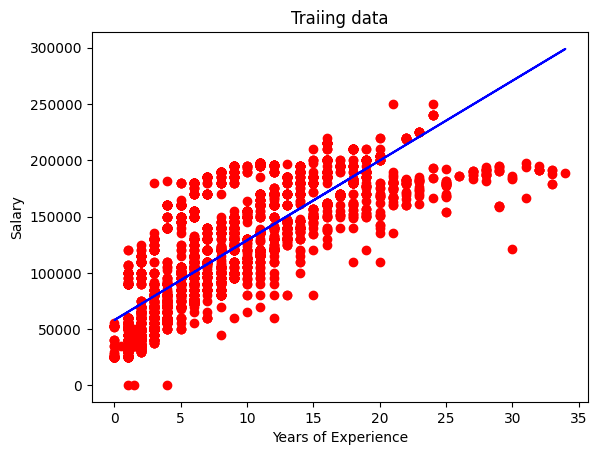

In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Traiing data')
plt.show()

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

###DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
d_model=DecisionTreeRegressor(criterion='friedman_mse',random_state=32)
d_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', random_state=32)

In [ ]:
dr_ypre=model.predict(x_test)
print(dr_ypre)
print(y_test)

[[ 79295.83696997]
 [157236.7997391 ]
 [121809.0893895 ]
 ...
 [107638.00524965]
 [ 79295.83696997]
 [ 79295.83696997]]
[[ 80000.]
 [170000.]
 [185000.]
 ...
 [108267.]
 [ 80000.]
 [120000.]]


In [ ]:
mse=mean_squared_error(y_test,dr_ypre)
round(mse)

961664564

###LogisticRegression

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/diabetes (1).csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
display(x.shape,y.shape)

(768, 8)

(768,)

In [ ]:
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.3,random_state=30)
display(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
x_train

(537, 8)

(231, 8)

(537,)

(231,)

array([[  1.   , 102.   ,  74.   , ...,  39.5  ,   0.293,  42.   ],
       [ 11.   ,  85.   ,  74.   , ...,  30.1  ,   0.3  ,  35.   ],
       [  1.   , 117.   ,  60.   , ...,  33.8  ,   0.466,  27.   ],
       ...,
       [  3.   , 128.   ,  78.   , ...,  21.1  ,   0.268,  55.   ],
       [  2.   , 117.   ,  90.   , ...,  25.2  ,   0.313,  21.   ],
       [  2.   ,  94.   ,  68.   , ...,  26.   ,   0.561,  21.   ]])

In [ ]:
model=LogisticRegression(solver='newton-cg',max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [ ]:
y_pred=model.predict(x_test)
print("Predicted answer",y_pred)
print("Acutual Answer",y_test)

Predicted answer [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 0]
Acutual Answer [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1
 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1
 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 1 0 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
acc=accuracy_score(y_test,y_pred)
print(acc*100)

[[140  19]
 [ 27  45]]
80.08658008658008


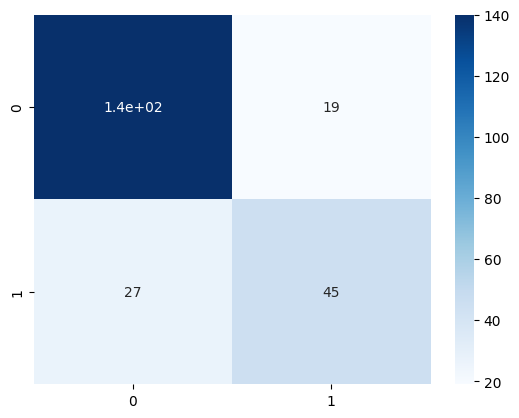

In [ ]:
sns.heatmap(cm,annot=True,cmap='Blues')
plt.show()

In [ ]:
import pickle
pickle.dump(model,open('LogisticRegression.pkl','wb'))

In [ ]:
p=pickle.load(open('LogisticRegression.pkl','rb'))
preg=int(input("Enter the preg"))
glu=int(input("Enter the glu"))
bp=int(input("Enter the bp"))
st=int(input("Enter the st"))
ins=int(input("Enter the ins"))
bmi=float(input("Enter the bmi"))
dpf=float(input("Enter the dpf"))
age=int(input("Enter the age"))
result=p.predict([[preg,glu,bp,st,ins,bmi,dpf,age]])
if result==1:
  print("Diabetic")
else:
  print("Non Diabetic")

Enter the preg0
Enter the glu200
Enter the bp180
Enter the st100
Enter the ins80
Enter the bmi25
Enter the dpf0.5
Enter the age36
Non Diabetic


###Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_model=DecisionTreeClassifier(criterion='entropy',random_state=30)
d_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=30)

In [ ]:
dyp=d_model.predict(x_test)
print(dyp)
print(y_test)

In [ ]:
dcm=confusion_matrix(y_test,dyp)
print(dcm)
dacc=accuracy_score(y_test,dyp)
print(acc*100)

In [ ]:
sns.heatmap(dcm,annot=True)
plt.show()

In [ ]:
pickle.dump(d_model,open('DecisionTree.pkl','wb'))

In [ ]:
d=pickle.load(open('DecisionTree.pkl','rb'))
preg=int(input("Enter the preg"))
glu=int(input("Enter the glu"))
bp=int(input("Enter the bp"))
st=int(input("Enter the st"))
ins=int(input("Enter the ins"))
bmi=float(input("Enter the bmi"))
dpf=float(input("Enter the dpf"))
age=int(input("Enter the age"))
result=d.predict([[preg,glu,bp,st,ins,bmi,dpf,age]])
if result==1:
  print("Diabetic")
else:
  print("Non Diabetic")

###svm

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.svm import SVC
svc_model=SVC(kernel='linear',random_state=30)
svc_model.fit(x_train,y_train)
scv_ypre=svc_model.predict(x_test)
print(scv_ypre)
print(y_test)

[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1
 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1
 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 1 0 0 0 0 0]


In [ ]:
svc_cm=confusion_matrix(y_test,scv_ypre)
print(svc_cm)
svc_acc=accuracy_score(y_test,scv_ypre)
print(svc_acc*100)

[[139  20]
 [ 28  44]]
79.22077922077922


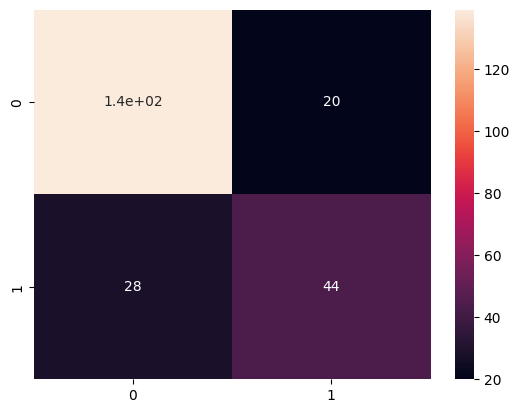

In [ ]:
sns.heatmap(svc_cm,annot=True)
plt.show()

In [ ]:
pickle.dump(svc_model,open('svm.pkl','wb'))

In [ ]:
sv=pickle.load(open('svm.pkl','rb'))
preg=int(input("Enter the preg"))
glu=int(input("Enter the glu"))
bp=int(input("Enter the bp"))
st=int(input("Enter the st"))
ins=int(input("Enter the ins"))
bmi=float(input("Enter the bmi"))
dpf=float(input("Enter the dpf"))
age=int(input("Enter the age"))
result=sv.predict([[preg,glu,bp,st,ins,bmi,dpf,age]])
if result==1:
  print("Diabetic")
else:
  print("Non Diabetic")

Enter the preg2
Enter the glu150
Enter the bp150
Enter the st100
Enter the ins100
Enter the bmi25
Enter the dpf0.5
Enter the age52
Diabetic
